In [2]:
%load_ext autoreload
%autoreload 2
import json
import sys
import os
import pickle
import logging
# logging.basicConfig(level=logging.INFO, filename="fasttext.log")
logging.basicConfig(level=logging.INFO, handlers=[logging.FileHandler("fasttext.log"), logging.StreamHandler(sys.stdout)])
logging.getLogger("gensim.models").setLevel(logging.WARNING)

import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 1000)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


from tqdm.notebook import tqdm
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    tqdm.pandas()

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from evaluation import *
from preprocessing import Corpus, BasicPreprocessing, BigramPreprocessor, SpacyPreprocessor, StopWordPreprocessor
from retrieval_algorithms.word_vector_retrieval_algorithm import *
from retrieval_algorithms.prf_wrapper import PRFWrapper
from retrieval_algorithms.ontology_expansion_wrapper import OntologyExpansionWrapper

In [3]:
base_file =  "../../data/kit_expert_2019_all_papers.csv"
p = [BasicPreprocessing(), StopWordPreprocessor()]
papers_basic = Corpus(base_file, p, load_from_cache=True, n_jobs=4)

INFO:preprocessing.pipeline:Start preprocessing pipeline "basic_NoStopWords" for file ../../data/kit_expert_2019_all_papers.csv.
INFO:preprocessing.pipeline:Loaded cached preprocessed corpus from ../../data/kit_expert_2019_all_papers_basic_NoStopWords


In [4]:
with open("../../data/kit_expert_2019_all_keywords.json", "r") as file:
    keywords = json.load(file)


In [5]:
general_keywords = [k for k in keywords if k["level"]<=1]
specific_keywords = [k for k in keywords if k["level"]>=2 and len(k["paper_ids"])>=10]

general_keywords_val = ("general keywords validation", general_keywords[0:int(len(general_keywords)*0.8)])
specific_keywords_val = ("specific keywords validation", specific_keywords[0:int(len(specific_keywords)*0.8)])
general_keywords_test = ("general keywords test", general_keywords[int(len(general_keywords)*0.8):])
specific_keywords_test = ("specific keywords test", specific_keywords[int(len(specific_keywords)*0.8):])

In [5]:
pretrained_models = [
    ("Fasttext from scratch w=5",
     WordVectorRetrievalAlgorithm(
        NewlyTrainedEmbedding(window_size=5, embedding_size=300, sg=False, negative=10, epochs=20),
        AverageSentenceEmbedding),
     papers_basic
    ),
    ("Fasttext from scratch w=5",
     WordVectorRetrievalAlgorithm(
        NewlyTrainedEmbedding(window_size=5, embedding_size=300, sg=True, negative=10, epochs=20),
        AverageSentenceEmbedding),
     papers_basic
    ),
    ("Fasttext pretrained wiki",
     WordVectorRetrievalAlgorithm(
        PreTrainedEmbedding("../../data/models/fasttext/wiki.en.bin"),
        AverageSentenceEmbedding),
     papers_basic
    ),
    ("Fasttext finetuned wiki",
     WordVectorRetrievalAlgorithm(
        FineTunedEmbedding("../../data/models/fasttext/wiki.en.bin", epochs=20),
        AverageSentenceEmbedding),
     papers_basic
    ),
]

In [10]:
pretrained_results = train_evaluate_models(pretrained_models, [general_keywords_val, specific_keywords_val], n_jobs=len(pretrained_models))

INFO:root:Start training model Fasttext from scratch w=5
INFO:root:Start training model Fasttext(win_size=5, emb_size=300, neg=10, epoch=20, sg=False)
INFO:root:Start training model Fasttext from scratch w=5
INFO:root:Start training model Fasttext(win_size=5, emb_size=300, neg=10, epoch=20, sg=True)
INFO:root:Start training model Fasttext pretrained wiki
INFO:root:Start loading model ../../data/models/fasttext/wiki.en.bin
INFO:root:Start training model Fasttext finetuned wiki
INFO:root:Start fine tuning model ../../data/models/fasttext/wiki.en.bin
INFO:root:"Fasttext(win_size=5, emb_size=300, neg=10, epoch=20, sg=False)" epoch #0 start
INFO:root:"Fasttext(win_size=5, emb_size=300, neg=10, epoch=20, sg=True)" epoch #0 start
INFO:root:"Fasttext(win_size=5, emb_size=300, neg=10, epoch=20, sg=False)" epoch #1 start
INFO:root:"Fasttext(win_size=5, emb_size=300, neg=10, epoch=20, sg=False)" epoch #2 start
INFO:root:"Fasttext(win_size=5, emb_size=300, neg=10, epoch=20, sg=False)" epoch #3 sta

INFO:root:"Fasttext(win_size=5, emb_size=300, neg=10, epoch=20, sg=True)" epoch #3 start
INFO:root:"Fasttext(win_size=5, emb_size=300, neg=10, epoch=20, sg=False)" epoch #7 start

INFO:root:Start evaluating model Fasttext pretrained wiki


INFO:root:"Fasttext(win_size=5, emb_size=300, neg=10, epoch=20, sg=False)" epoch #8 start
INFO:root:"Fasttext(win_size=5, emb_size=300, neg=10, epoch=20, sg=True)" epoch #4 start
INFO:root:"Fasttext(win_size=5, emb_size=300, neg=10, epoch=20, sg=False)" epoch #9 start
INFO:root:"Fasttext(win_size=5, emb_size=300, neg=10, epoch=20, sg=True)" epoch #5 start
INFO:root:"Fasttext(win_size=5, emb_size=300, neg=10, epoch=20, sg=False)" epoch #10 start
INFO:root:"Finetuned" epoch #0 start
INFO:root:"Fasttext(win_size=5, emb_size=300, neg=10, epoch=20, sg=True)" epoch #6 start
INFO:root:"Fasttext(win_size=5, emb_size=300, neg=10, epoch=20, sg=False)" epoch #11 start
INFO:root:"Finetuned" epoch #1 start
INFO:root:"Fasttext(win_size=5, emb_size=300, neg=10, epoch=20, sg=False)" epoch #12 start
INFO:root:"Fasttext(win_size=5, emb_size=300, neg=10, epoch=20, sg=True)" epoch #7 start

INFO:root:Finished processing model Fasttext pretrained wiki
INFO:root:"Fasttext(win_size=5, emb_size=300, neg=10, e

INFO:root:"Fasttext(win_size=5, emb_size=300, neg=10, epoch=20, sg=True)" epoch #12 start

INFO:root:Start evaluating model Fasttext from scratch w=5


INFO:root:"Finetuned" epoch #8 start
INFO:root:"Fasttext(win_size=5, emb_size=300, neg=10, epoch=20, sg=True)" epoch #13 start
INFO:root:"Finetuned" epoch #9 start
INFO:root:"Finetuned" epoch #10 start
INFO:root:"Fasttext(win_size=5, emb_size=300, neg=10, epoch=20, sg=True)" epoch #14 start
INFO:root:"Finetuned" epoch #11 start

INFO:root:Finished processing model Fasttext from scratch w=5
INFO:root:"Fasttext(win_size=5, emb_size=300, neg=10, epoch=20, sg=True)" epoch #15 start
INFO:root:"Finetuned" epoch #12 start
INFO:root:"Finetuned" epoch #13 start
INFO:root:"Fasttext(win_size=5, emb_size=300, neg=10, epoch=20, sg=True)" epoch #16 start
INFO:root:"Finetuned" epoch #14 start
INFO:root:"Fasttext(win_size=5, emb_size=300, neg=10, epoch=20, sg=True)" epoch #17 start
INFO:root:"Finetuned" epoch #15 start
INFO:root:"Fasttext(win_size=5, emb_size=300, neg=10, epoch=20, sg=True)" epoch #18 start
INFO:root:"Finetuned" epoch #16 start
INFO:root:"Finetuned" epoch #17 start
INFO:root:"Fasttext

INFO:root:"Finetuned" epoch #19 start

INFO:root:Start evaluating model Fasttext from scratch w=5


INFO:root:Finished fine tuning model ../../data/models/fasttext/wiki.en.bin



INFO:root:Finished processing model Fasttext from scratch w=5

INFO:root:Start evaluating model Fasttext finetuned wiki



INFO:root:Finished processing model Fasttext finetuned wiki


In [ ]:
pretrained_results.to_csv("../../data/results/fasttext_pretrained_results.csv")
print("mAP scores for pretrained models:")
pretrained_results

In [5]:
pretrained_results = pd.read_csv("../../data/results/fasttext_pretrained_results.csv", index_col=0, header=[0,1,2])
pretrained_results

general keywords validation                                                                              specific keywords validation                                                                             
                                                  p@5          p@10          p@20        R-prec           mAP         bpref                                 p@5          p@10          p@20        R-prec           mAP         bpref       
                                                  avg    err    avg    err    avg    err    avg    err    avg    err    avg    err                          avg    err    avg    err    avg    err    avg    err    avg    err    avg    err
Fasttext from scratch w=5                       0.271  0.043  0.246  0.038  0.221  0.034  0.131  0.019  0.106  0.017  0.100  0.017                        0.317  0.008  0.270  0.007  0.220  0.006  0.177  0.004  0.147  0.004  0.142  0.004
Fasttext from scratch w=5                       0.309  0.044  0.278  0.039  0.256  0.035  0.166  0.022  0.139  0.020  0.131  0.020                        0.420  0.008  0.362  0.007  0.295  0.006  0.248  0.005  0.224  0.005  0.210  0.005
Fasttext pretrained wiki                        0.295  0.041  0.273  0.036  0.251  0.032  0.161  0.018  0.131  0.016  0.120  0.015                        0.278  0.007  0.232  0.006  0.186  0.005  0.151  0.003  0.120  0.003  0.118  0.003
Fasttext finetuned wiki                         0.312  0.043  0.286  0.038  0.266  0.035  0.180  0.022  0.153  0.021  0.143  0.020                        0.383  0.008  0.326  0.007  0.264  0.006  0.220  0.004  0.195  0.004  0.182  0.004

In [6]:
print(to_latex_table(pretrained_results))

\textbf{general queries}\\
Fasttext from scratch w=5 & 0.271 & 0.246 & 0.221 & 0.131 & 0.106 & 0.100\\
 & \small{±0.043} & \small{±0.038} & \small{±0.034} & \small{±0.019} & \small{±0.017} & \small{±0.017}\\[0.15cm]
Fasttext from scratch w=5 & 0.309 & 0.278 & 0.256 & 0.166 & 0.139 & 0.131\\
 & \small{±0.044} & \small{±0.039} & \small{±0.035} & \small{±0.022} & \small{±0.020} & \small{±0.020}\\[0.15cm]
Fasttext pretrained wiki & 0.295 & 0.273 & 0.251 & 0.161 & 0.131 & 0.120\\
 & \small{±0.041} & \small{±0.036} & \small{±0.032} & \small{±0.018} & \small{±0.016} & \small{±0.015}\\[0.15cm]
Fasttext finetuned wiki & 0.312 & 0.286 & 0.266 & 0.180 & 0.153 & 0.143\\
 & \small{±0.043} & \small{±0.038} & \small{±0.035} & \small{±0.022} & \small{±0.021} & \small{±0.020}\\[0.15cm]
\addlinespace
\textbf{specific queries}\\
Fasttext from scratch w=5 & 0.317 & 0.270 & 0.220 & 0.177 & 0.147 & 0.142\\
 & \small{±0.008} & \small{±0.007} & \small{±0.006} & \small{±0.004} & \small{±0.004} & \small{±0.004}

In [13]:
search_negative_models = [
    (f"Fasttext from scratch n={negative}",
     WordVectorRetrievalAlgorithm(
         NewlyTrainedEmbedding(window_size=5, embedding_size=300, sg=True, negative=negative, epochs=20),
         AverageSentenceEmbedding),
     papers_basic)
    for negative in [5,10,15,20,25,30,40]
]

In [ ]:
search_negative_results = train_evaluate_models(search_negative_models, [general_keywords_val, specific_keywords_val], n_jobs=10)

In [ ]:
search_negative_results.to_csv("../../data/results/fasttext_search_negative_results.csv")

In [6]:
search_negative_results = pd.read_csv("../../data/results/fasttext_search_negative_results.csv", index_col=0, header=[0,1,2])

In [7]:
search_negative_results

general keywords validation                                                                              specific keywords validation                                                                             
                                                   p@5          p@10          p@20        R-prec           mAP         bpref                                 p@5          p@10          p@20        R-prec           mAP         bpref       
                                                   avg    err    avg    err    avg    err    avg    err    avg    err    avg    err                          avg    err    avg    err    avg    err    avg    err    avg    err    avg    err
Fasttext from scratch n=5                        0.304  0.044  0.278  0.039  0.254  0.036  0.165  0.022  0.139  0.021  0.131  0.020                        0.415  0.008  0.356  0.007  0.290  0.006  0.243  0.005  0.220  0.005  0.205  0.004
Fasttext from scratch n=10                       0.298  0.043  0.280  0.039  0.252  0.035  0.165  0.022  0.139  0.021  0.131  0.020                        0.422  0.008  0.361  0.007  0.294  0.006  0.247  0.005  0.224  0.005  0.209  0.005
Fasttext from scratch n=15                       0.303  0.044  0.277  0.039  0.254  0.035  0.165  0.022  0.138  0.020  0.130  0.020                        0.424  0.008  0.365  0.007  0.296  0.006  0.249  0.005  0.226  0.005  0.211  0.005
Fasttext from scratch n=20                       0.302  0.044  0.278  0.039  0.250  0.035  0.164  0.022  0.138  0.020  0.129  0.019                        0.426  0.008  0.365  0.007  0.298  0.006  0.251  0.005  0.227  0.005  0.213  0.005
Fasttext from scratch n=25                       0.303  0.044  0.281  0.039  0.255  0.036  0.166  0.022  0.140  0.021  0.132  0.020                        0.427  0.008  0.367  0.007  0.299  0.006  0.252  0.005  0.228  0.005  0.213  0.005
Fasttext from scratch n=30                       0.306  0.044  0.278  0.039  0.251  0.035  0.164  0.022  0.137  0.020  0.129  0.019                        0.428  0.008  0.367  0.007  0.300  0.006  0.252  0.005  0.230  0.005  0.214  0.005
Fasttext from scratch n=40                       0.293  0.044  0.275  0.039  0.250  0.035  0.165  0.022  0.138  0.020  0.130  0.020                        0.429  0.008  0.368  0.007  0.301  0.006  0.253  0.005  0.230  0.005  0.215  0.005

In [6]:
window_size_grid = [2,4,6,8,10,15,20,30,40,50]
search_window_size_models = [
    (f"Fasttext from scratch w={window_size}",
     WordVectorRetrievalAlgorithm(
         NewlyTrainedEmbedding(window_size=window_size, embedding_size=700, sg=True, negative=10, epochs=20),
         AverageSentenceEmbedding),
     papers_basic)
    for window_size in window_size_grid
]

In [ ]:
search_window_size_results = train_evaluate_models(search_window_size_models, [general_keywords_val, specific_keywords_val], n_jobs=3)

In [99]:
search_window_size_results.to_csv("../../data/results/fasttext_search_window_size_results.csv")

In [7]:
search_window_size_results = pd.read_csv("../../data/results/fasttext_search_window_size_results.csv", index_col=0, header=[0,1,2])

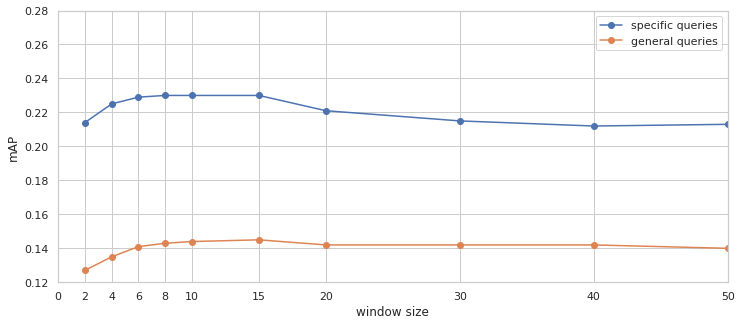

In [8]:
plot_data = search_window_size_results.xs('mAP', level=1, axis=1).xs('avg', level=1, axis=1)
err_data = search_window_size_results.xs('mAP', level=1, axis=1).xs('err', level=1, axis=1)
plot_data.index = window_size_grid
ax = plot_data.iloc[:,1].plot(label="specific queries", figsize=(12,5), style="-o", legend=True, xticks=[0]+window_size_grid, xlim=(0,50), ylim=(0.12,0.28))
ax = plot_data.iloc[:,0].plot(label="general queries", figsize=(12,5), style="-o", legend=True, xticks=[0]+window_size_grid, xlim=(0,50), ylim=(0.12,0.28))
ax.set_ylabel("mAP");
ax.set_xlabel("window size")
# plt.fill_between(plot_data.index, plot_data.iloc[:,1].values-err_data.iloc[:,1].values, plot_data.iloc[:,1].values+err_data.iloc[:,1].values,
#     alpha=0.4, edgecolor=sns.color_palette("Blues")[3], facecolor=sns.color_palette("Blues")[1], linewidth=1)
# plt.fill_between(plot_data.index, plot_data.iloc[:,0].values-err_data.iloc[:,0].values, plot_data.iloc[:,0].values+err_data.iloc[:,0].values,
#     alpha=0.4, edgecolor=sns.color_palette("Oranges")[3], facecolor=sns.color_palette("Oranges")[1], linewidth=1)
plt.savefig("images/fasttext_window_size_search.pdf", transparent=True, bbox_inches="tight")

In [26]:
search_window_size_results.xs('mAP', level=1, axis=1).xs('avg', level=1, axis=1)

,general keywords validation,specific keywords validation
Fasttext from scratch w=2,0.127,0.214
Fasttext from scratch w=4,0.135,0.225
Fasttext from scratch w=6,0.141,0.229
Fasttext from scratch w=8,0.143,0.230
Fasttext from scratch w=10,0.144,0.230
Fasttext from scratch w=15,0.145,0.227
Fasttext from scratch w=20,0.142,0.221
Fasttext from scratch w=30,0.142,0.215
Fasttext from scratch w=40,0.142,0.212
Fasttext from scratch w=50,0.140,0.213


In [9]:
vec_size_grid = [100,200,300,400,500,600,700,800,900,1000]
search_vec_size_models = [
    (f"Fasttext from scratch s={embedding_size}",
     WordVectorRetrievalAlgorithm(
         NewlyTrainedEmbedding(window_size=15, embedding_size=embedding_size, sg=True, negative=20, epochs=20),
         AverageSentenceEmbedding),
     papers_basic)
    for embedding_size in vec_size_grid
]

In [ ]:
search_vec_size_results = train_evaluate_models(search_vec_size_models, [general_keywords_val, specific_keywords_val], n_jobs=8)

In [10]:
search_vec_size_results.to_csv("../../data/results/fasttext_search_vec_size_results.csv")
search_vec_size_results

general keywords validation                                                                              specific keywords validation                                                                             
                                                     p@5          p@10          p@20        R-prec           mAP         bpref                                 p@5          p@10          p@20        R-prec           mAP         bpref       
                                                     avg    err    avg    err    avg    err    avg    err    avg    err    avg    err                          avg    err    avg    err    avg    err    avg    err    avg    err    avg    err
Fasttext from scratch s=100                        0.275  0.041  0.267  0.039  0.251  0.037  0.161  0.022  0.138  0.021  0.128  0.020                        0.308  0.008  0.262  0.006  0.213  0.005  0.179  0.004  0.151  0.004  0.143  0.004
Fasttext from scratch s=200                        0.292  0.043  0.277  0.039  0.257  0.036  0.169  0.022  0.143  0.021  0.135  0.020                        0.387  0.008  0.331  0.007  0.267  0.006  0.226  0.004  0.200  0.005  0.188  0.004
Fasttext from scratch s=300                        0.302  0.042  0.282  0.038  0.266  0.036  0.174  0.022  0.146  0.021  0.139  0.021                        0.424  0.008  0.363  0.007  0.295  0.006  0.250  0.005  0.227  0.005  0.212  0.005
Fasttext from scratch s=400                        0.303  0.043  0.277  0.038  0.261  0.035  0.172  0.022  0.145  0.021  0.137  0.021                        0.443  0.009  0.382  0.007  0.311  0.006  0.265  0.005  0.243  0.005  0.227  0.005
Fasttext from scratch s=500                        0.321  0.044  0.280  0.039  0.262  0.035  0.174  0.022  0.146  0.021  0.139  0.020                        0.456  0.009  0.395  0.007  0.323  0.006  0.276  0.005  0.255  0.005  0.238  0.005
Fasttext from scratch s=600                        0.313  0.044  0.283  0.039  0.261  0.035  0.175  0.022  0.147  0.021  0.139  0.020                        0.464  0.009  0.404  0.008  0.330  0.006  0.282  0.005  0.264  0.005  0.246  0.005
Fasttext from scratch s=700                        0.311  0.044  0.279  0.039  0.263  0.035  0.175  0.022  0.147  0.021  0.140  0.021                        0.472  0.009  0.409  0.008  0.335  0.007  0.288  0.005  0.270  0.005  0.251  0.005
Fasttext from scratch s=800                        0.308  0.043  0.284  0.039  0.259  0.035  0.174  0.022  0.145  0.021  0.138  0.020                        0.475  0.009  0.414  0.008  0.339  0.007  0.292  0.005  0.276  0.005  0.256  0.005
Fasttext from scratch s=900                        0.308  0.044  0.283  0.039  0.263  0.035  0.175  0.022  0.145  0.021  0.138  0.020                        0.479  0.009  0.416  0.008  0.342  0.007  0.296  0.005  0.280  0.006  0.259  0.005
Fasttext from scratch s=1000                       0.303  0.044  0.287  0.039  0.257  0.035  0.174  0.022  0.144  0.021  0.137  0.020                        0.480  0.009  0.419  0.008  0.345  0.007  0.299  0.005  0.283  0.006  0.262  0.005

In [10]:
search_vec_size_results = pd.read_csv("../../data/results/fasttext_search_vec_size_results.csv", index_col=0, header=[0,1,2])

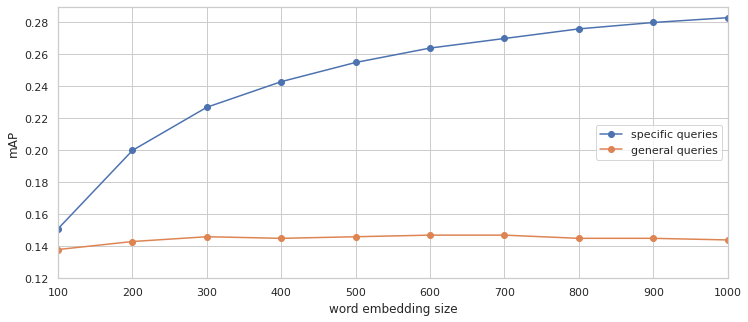

In [11]:
plot_data = search_vec_size_results.xs('mAP', level=1, axis=1).xs('avg', level=1, axis=1)
err_data = search_vec_size_results.xs('mAP', level=1, axis=1).xs('err', level=1, axis=1)
plot_data.index = vec_size_grid
ax = plot_data.iloc[:,1].plot(label="specific queries", figsize=(12,5), style="-o", legend=True, xticks=[0]+vec_size_grid, xlim=(100,1000), ylim=(0.12,0.29))
ax = plot_data.iloc[:,0].plot(label="general queries", figsize=(12,5), style="-o", legend=True, xticks=[0]+vec_size_grid, xlim=(100,1000), ylim=(0.12,0.29))
ax.set_ylabel("mAP");
ax.set_xlabel("word embedding size")
ax.legend(loc="center right")
# plt.fill_between(plot_data.index, plot_data.iloc[:,1].values-err_data.iloc[:,1].values, plot_data.iloc[:,1].values+err_data.iloc[:,1].values,
#     alpha=0.4, edgecolor=sns.color_palette("Blues")[3], facecolor=sns.color_palette("Blues")[1], linewidth=1)
# plt.fill_between(plot_data.index, plot_data.iloc[:,0].values-err_data.iloc[:,0].values, plot_data.iloc[:,0].values+err_data.iloc[:,0].values,
#     alpha=0.4, edgecolor=sns.color_palette("Oranges")[3], facecolor=sns.color_palette("Oranges")[1], linewidth=1)
plt.savefig("images/fasttext_vec_size_search.pdf", transparent=True, bbox_inches="tight")

In [ ]:
search_vec_size_models_2 = [
    (f"Fasttext from scratch s={embedding_size}",
     WordVectorRetrievalAlgorithm(
         NewlyTrainedEmbedding(window_size=15, embedding_size=embedding_size, sg=True, negative=20, epochs=20),
         AverageSentenceEmbedding),
     papers_basic)
    for embedding_size in [1100, 1200, 1300, 1400, 1500, 1600, 2000]
]
search_vec_size_results_2 = train_evaluate_models(search_vec_size_models_2, [general_keywords_val, specific_keywords_val], n_jobs=7)
search_vec_size_results_2.to_csv("../../data/results/fasttext_search_vec_size_results_2.csv")
search_vec_size_results_2

INFO:root:Start training model Fasttext from scratch s=1100
INFO:root:Start training model Fasttext(win_size=15, emb_size=1100, neg=20, epoch=20, sg=True)
INFO:root:Start training model Fasttext from scratch s=1200
INFO:root:Start training model Fasttext(win_size=15, emb_size=1200, neg=20, epoch=20, sg=True)
INFO:root:Start training model Fasttext from scratch s=1300
INFO:root:Start training model Fasttext(win_size=15, emb_size=1300, neg=20, epoch=20, sg=True)
INFO:root:Start training model Fasttext from scratch s=1400
INFO:root:Start training model Fasttext(win_size=15, emb_size=1400, neg=20, epoch=20, sg=True)
INFO:root:Start training model Fasttext from scratch s=1500
INFO:root:Start training model Fasttext(win_size=15, emb_size=1500, neg=20, epoch=20, sg=True)
INFO:root:Start training model Fasttext from scratch s=1600
INFO:root:Start training model Fasttext(win_size=15, emb_size=1600, neg=20, epoch=20, sg=True)
INFO:root:Start training model Fasttext from scratch s=2000
INFO:root:

In [ ]:
search_vec_size_results_2 = pd.read_csv("../../data/results/fasttext_search_vec_size_results_2.csv", index_col=0, header=[0,1,2])

In [ ]:
search_vec_size_results_2

In [10]:
search_finetune_epoch_models = [(f"Finetune epoch={epoch}",
     WordVectorRetrievalAlgorithm(
         FineTunedEmbedding("../../data/models/fasttext/wiki.en.bin", epochs=epoch),
         AverageSentenceEmbedding),
     papers_basic)
    for epoch in [5,10,15,20,25,30,35,40,45,50]
]

In [ ]:
search_finetune_epoch_results = train_evaluate_models(search_finetune_epoch_models, [general_keywords_val, specific_keywords_val], n_jobs=4)

INFO:root:Start training model Finetune epoch=5
INFO:root:Start fine tuning model ../../data/models/fasttext/wiki.en.bin
INFO:root:Start training model Finetune epoch=10
INFO:root:Start fine tuning model ../../data/models/fasttext/wiki.en.bin
INFO:root:Start training model Finetune epoch=15
INFO:root:Start fine tuning model ../../data/models/fasttext/wiki.en.bin
INFO:root:Start training model Finetune epoch=20
INFO:root:Start fine tuning model ../../data/models/fasttext/wiki.en.bin


In [13]:
search_finetune_epoch_results

general keywords validation                                                                             specific keywords validation                                                                             
                                          p@5          p@10          p@20        R-prec           mAP         bpref                                p@5          p@10          p@20        R-prec           mAP         bpref       
                                          avg    err    avg    err    avg    err    avg    err    avg    err    avg   err                          avg    err    avg    err    avg    err    avg    err    avg    err    avg    err
Finetune epoch=5                        0.296  0.043  0.286  0.039  0.266  0.035  0.179  0.022  0.153  0.021  0.142  0.02                        0.342  0.008  0.289  0.007  0.235  0.006  0.193  0.004  0.166  0.004  0.157  0.004
Finetune epoch=10                       0.299  0.043  0.291  0.039  0.266  0.035  0.182  0.022  0.154  0.021  0.143  0.02                        0.362  0.008  0.307  0.007  0.250  0.006  0.207  0.004  0.181  0.004  0.169  0.004
Finetune epoch=15                       0.310  0.043  0.287  0.039  0.262  0.034  0.179  0.022  0.152  0.021  0.142  0.02                        0.374  0.008  0.318  0.007  0.260  0.006  0.215  0.004  0.189  0.004  0.178  0.004
Finetune epoch=20                       0.305  0.043  0.288  0.039  0.262  0.035  0.180  0.022  0.153  0.021  0.143  0.02                        0.381  0.008  0.325  0.007  0.263  0.006  0.220  0.004  0.194  0.004  0.182  0.004
Finetune epoch=25                       0.308  0.044  0.286  0.039  0.265  0.035  0.178  0.022  0.151  0.021  0.141  0.02                        0.387  0.008  0.330  0.007  0.268  0.006  0.224  0.004  0.198  0.004  0.186  0.004
Finetune epoch=30                       0.308  0.043  0.286  0.039  0.265  0.035  0.177  0.022  0.151  0.021  0.141  0.02                        0.391  0.008  0.332  0.007  0.270  0.006  0.226  0.004  0.201  0.004  0.188  0.004
Finetune epoch=35                       0.311  0.044  0.282  0.039  0.263  0.035  0.177  0.022  0.150  0.021  0.141  0.02                        0.393  0.008  0.336  0.007  0.272  0.006  0.228  0.004  0.202  0.004  0.190  0.004
Finetune epoch=40                       0.311  0.043  0.281  0.038  0.259  0.035  0.176  0.022  0.149  0.021  0.140  0.02                        0.397  0.008  0.337  0.007  0.273  0.006  0.229  0.004  0.203  0.004  0.190  0.004
Finetune epoch=45                       0.309  0.044  0.283  0.038  0.260  0.034  0.177  0.022  0.149  0.021  0.140  0.02                        0.400  0.008  0.339  0.007  0.275  0.006  0.230  0.004  0.205  0.004  0.192  0.004
Finetune epoch=50                       0.306  0.043  0.278  0.038  0.260  0.035  0.175  0.022  0.148  0.021  0.138  0.02                        0.402  0.008  0.341  0.007  0.276  0.006  0.231  0.004  0.206  0.004  0.193  0.004

In [ ]:
search_finetune_epoch_results.to_csv("../../data/results/search_finetune_epoch_results.csv")

In [ ]:
best_embedding = FineTunedEmbedding("../../data/models/fasttext/wiki.en.bin", epochs=20)
model = best_embedding.train_model(papers_basic)

INFO:root:Start fine tuning model ../../data/models/fasttext/wiki.en.bin
INFO:root:"Finetuned" epoch #0 start
INFO:root:"Finetuned" epoch #1 start
INFO:root:"Finetuned" epoch #2 start
INFO:root:"Finetuned" epoch #3 start
INFO:root:"Finetuned" epoch #4 start
INFO:root:"Finetuned" epoch #5 start
INFO:root:"Finetuned" epoch #6 start
INFO:root:"Finetuned" epoch #7 start
INFO:root:"Finetuned" epoch #8 start
INFO:root:"Finetuned" epoch #9 start
INFO:root:"Finetuned" epoch #10 start
INFO:root:"Finetuned" epoch #11 start


In [ ]:
model.save("../../data/models/fasttext/best_embedding.emb")

In [11]:
sentence_embedding_models = [
    ("Fasttext from scratch average embedding",
     WordVectorRetrievalAlgorithm(
         PreTrainedEmbedding("../../data/models/fasttext/best_embedding.emb"),
         AverageSentenceEmbedding),
     papers_basic),
    ("Fasttext from scratch idf embedding",
     WordVectorRetrievalAlgorithm(
         PreTrainedEmbedding("../../data/models/fasttext/best_embedding.emb"),
         TfidfSentenceEmbedding),
     papers_basic),
#     ("Fasttext from scratch sif embedding",
#      WordVectorRetrievalAlgorithm(
#          PreTrainedEmbedding("../../data/models/fasttext/best_embedding.emb"),
#          SifSentenceEmbedding),
#      papers_basic),
]

In [ ]:
sentence_embedding_results = train_evaluate_models(sentence_embedding_models, [general_keywords_val, specific_keywords_val], n_jobs=1)

In [14]:
sentence_embedding_results.to_csv("../../data/results/fasttext_wiki_sentence_embedding_results.csv")

In [20]:
sentence_embedding_results = pd.read_csv("../../data/results/fasttext_wiki_sentence_embedding_results.csv", index_col=0, header=[0,1,2])
sentence_embedding_results

general keywords validation                                                                             specific keywords validation                                                                             
                                                                p@5          p@10          p@20        R-prec           mAP         bpref                                p@5          p@10          p@20        R-prec           mAP         bpref       
                                                                avg    err    avg    err    avg    err    avg    err    avg    err    avg   err                          avg    err    avg    err    avg    err    avg    err    avg    err    avg    err
Fasttext from scratch average embedding                       0.305  0.044  0.284  0.038  0.262  0.035  0.178  0.022  0.152  0.021  0.141  0.02                        0.384  0.008  0.325  0.007  0.264  0.006  0.220  0.004  0.195  0.004  0.182  0.004
Fasttext from scratch idf embedding                           0.317  0.044  0.293  0.039  0.268  0.035  0.185  0.022  0.159  0.021  0.147  0.02                        0.437  0.009  0.376  0.007  0.305  0.006  0.258  0.005  0.236  0.005  0.221  0.005

In [6]:
print(to_latex_table(sentence_embedding_results))

\textbf{general queries}\\
Fasttext from scratch average embedding & 0.305 & 0.284 & 0.262 & 0.178 & 0.152 & 0.141\\
 & \small{±0.044} & \small{±0.038} & \small{±0.035} & \small{±0.022} & \small{±0.021} & \small{±0.020}\\[0.15cm]
Fasttext from scratch idf embedding & 0.317 & 0.293 & 0.268 & 0.185 & 0.159 & 0.147\\
 & \small{±0.044} & \small{±0.039} & \small{±0.035} & \small{±0.022} & \small{±0.021} & \small{±0.020}\\[0.15cm]
\addlinespace
\textbf{specific queries}\\
Fasttext from scratch average embedding & 0.384 & 0.325 & 0.264 & 0.220 & 0.195 & 0.182\\
 & \small{±0.008} & \small{±0.007} & \small{±0.006} & \small{±0.004} & \small{±0.004} & \small{±0.004}\\[0.15cm]
Fasttext from scratch idf embedding & 0.437 & 0.376 & 0.305 & 0.258 & 0.236 & 0.221\\
 & \small{±0.009} & \small{±0.007} & \small{±0.006} & \small{±0.005} & \small{±0.005} & \small{±0.005}\\[0.15cm]



In [10]:
prf_grid = [(150,200,np.round(i,3)) for i in np.linspace(0,1,11)]
search_prf_models = [(f"prf nrd={nrd:.2f} net={net:.2f} ew={ew:.2f}", PRFWrapper(WordVectorRetrievalAlgorithm(
    PreTrainedEmbedding("../../data/models/fasttext/best_embedding.emb"),
    TfidfSentenceEmbedding), nrd, net, ew), papers_basic) for nrd, net, ew in prf_grid]

In [ ]:
search_prf_results = train_evaluate_models(search_prf_models, [general_keywords_val, specific_keywords_val], n_jobs=5)

In [8]:
search_prf_results.to_csv("../../data/results/fasttext_wiki_search_prf_results.csv")

In [12]:
search_prf_results = pd.read_csv("../../data/results/fasttext_wiki_search_prf_results.csv", index_col=0, header=[0,1,2])
search_prf_results

general keywords validation                                                                              specific keywords validation                                                                             
                                                          p@5          p@10          p@20        R-prec           mAP         bpref                                 p@5          p@10          p@20        R-prec           mAP         bpref       
                                                          avg    err    avg    err    avg    err    avg    err    avg    err    avg    err                          avg    err    avg    err    avg    err    avg    err    avg    err    avg    err
prf nrd=150.00 net=200.00 ew=0.00                       0.246  0.044  0.237  0.041  0.233  0.038  0.151  0.023  0.134  0.022  0.122  0.021                        0.174  0.007  0.156  0.006  0.137  0.005  0.110  0.003  0.091  0.003  0.082  0.003
prf nrd=150.00 net=200.00 ew=0.10                       0.260  0.045  0.249  0.041  0.237  0.038  0.156  0.023  0.138  0.022  0.126  0.021                        0.218  0.007  0.191  0.006  0.163  0.005  0.131  0.004  0.110  0.003  0.101  0.003
prf nrd=150.00 net=200.00 ew=0.20                       0.275  0.046  0.260  0.042  0.245  0.038  0.161  0.023  0.142  0.022  0.130  0.021                        0.263  0.008  0.226  0.006  0.188  0.005  0.152  0.004  0.131  0.004  0.121  0.004
prf nrd=150.00 net=200.00 ew=0.30                       0.288  0.046  0.273  0.042  0.252  0.038  0.165  0.023  0.146  0.022  0.135  0.021                        0.304  0.008  0.258  0.007  0.210  0.006  0.172  0.004  0.151  0.004  0.140  0.004
prf nrd=150.00 net=200.00 ew=0.40                       0.300  0.046  0.282  0.041  0.260  0.038  0.168  0.023  0.150  0.022  0.137  0.021                        0.337  0.008  0.285  0.007  0.231  0.006  0.190  0.004  0.169  0.004  0.157  0.004
prf nrd=150.00 net=200.00 ew=0.50                       0.308  0.045  0.291  0.041  0.263  0.038  0.173  0.022  0.152  0.022  0.140  0.021                        0.363  0.008  0.309  0.007  0.248  0.006  0.207  0.004  0.185  0.005  0.173  0.004
prf nrd=150.00 net=200.00 ew=0.60                       0.320  0.045  0.293  0.041  0.270  0.038  0.177  0.022  0.155  0.022  0.142  0.021                        0.386  0.008  0.328  0.007  0.264  0.006  0.221  0.005  0.199  0.005  0.186  0.004
prf nrd=150.00 net=200.00 ew=0.70                       0.322  0.044  0.293  0.040  0.272  0.037  0.184  0.023  0.160  0.022  0.148  0.022                        0.405  0.009  0.344  0.007  0.276  0.006  0.233  0.005  0.211  0.005  0.197  0.005
prf nrd=150.00 net=200.00 ew=0.80                       0.319  0.044  0.295  0.040  0.272  0.036  0.186  0.023  0.160  0.022  0.149  0.021                        0.418  0.009  0.358  0.007  0.288  0.006  0.243  0.005  0.221  0.005  0.207  0.005
prf nrd=150.00 net=200.00 ew=0.90                       0.322  0.044  0.295  0.040  0.271  0.036  0.186  0.023  0.160  0.022  0.148  0.021                        0.428  0.009  0.368  0.007  0.297  0.006  0.252  0.005  0.230  0.005  0.215  0.005
prf nrd=150.00 net=200.00 ew=1.00                       0.317  0.044  0.293  0.039  0.268  0.035  0.185  0.022  0.159  0.021  0.147  0.020                        0.437  0.009  0.376  0.007  0.305  0.006  0.258  0.005  0.236  0.005  0.221  0.005

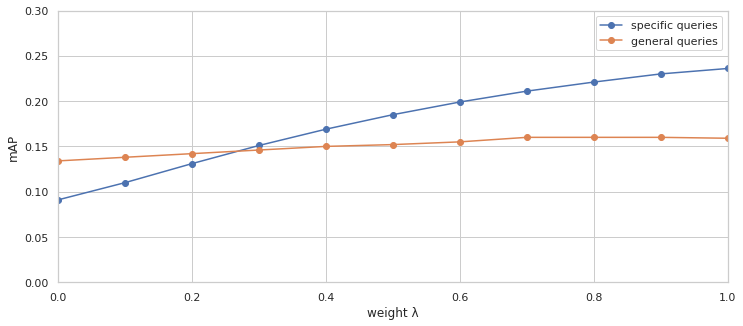

In [13]:
plot_data = search_prf_results.xs('mAP', level=1, axis=1).xs('avg', level=1, axis=1)
err_data = search_prf_results.xs('mAP', level=1, axis=1).xs('err', level=1, axis=1)
plot_data.index = np.linspace(0,1,11)
ax = plot_data.iloc[:,1].plot(label="specific queries", figsize=(12,5), style="-o", legend=True, xlim=(0,1), ylim=(0.0,0.3))
ax = plot_data.iloc[:,0].plot(label="general queries", figsize=(12,5), style="-o", legend=True, xlim=(0,1), ylim=(0.0,0.3))
ax.set_ylabel("mAP");
ax.set_xlabel("weight λ")
# plt.fill_between(plot_data.index, plot_data.iloc[:,1].values-err_data.iloc[:,1].values, plot_data.iloc[:,1].values+err_data.iloc[:,1].values,
#     alpha=0.4, edgecolor=sns.color_palette("Blues")[3], facecolor=sns.color_palette("Blues")[1], linewidth=1)
# plt.fill_between(plot_data.index, plot_data.iloc[:,0].values-err_data.iloc[:,0].values, plot_data.iloc[:,0].values+err_data.iloc[:,0].values,
#     alpha=0.4, edgecolor=sns.color_palette("Oranges")[3], facecolor=sns.color_palette("Oranges")[1], linewidth=1)
plt.savefig("images/fasttext_prf_search.pdf", transparent=True, bbox_inches="tight")

In [24]:
model = WordVectorRetrievalAlgorithm( PreTrainedEmbedding("../../data/models/fasttext/best_embedding.emb"), TfidfSentenceEmbedding)
model.prepare(papers_basic)

INFO:root:Start loading model ../../data/models/fasttext/best_embedding.emb
INFO:gensim.utils:loading FastTextKeyedVectors object from ../../data/models/fasttext/best_embedding.emb
INFO:gensim.utils:loading vectors from ../../data/models/fasttext/best_embedding.emb.vectors.npy with mmap=None
INFO:gensim.utils:loading vectors_vocab from ../../data/models/fasttext/best_embedding.emb.vectors_vocab.npy with mmap=None
INFO:gensim.utils:loading vectors_ngrams from ../../data/models/fasttext/best_embedding.emb.vectors_ngrams.npy with mmap=None
INFO:gensim.utils:setting ignored attribute vectors_norm to None
INFO:gensim.utils:setting ignored attribute vectors_ngrams_norm to None
INFO:gensim.utils:setting ignored attribute vectors_vocab_norm to None
INFO:gensim.utils:setting ignored attribute buckets_word to None
INFO:gensim.utils:loaded ../../data/models/fasttext/best_embedding.emb
INFO:root:Finished loading model ../../data/models/fasttext/best_embedding.emb


/root/.local/share/virtualenvs/paper_retrieval-dhADrxe5/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [28]:
evaluate_model(model, [("bla", [k for k in keywords if k["keyword"]=="Remote sensing"])])

{('bla', 'p@5', 'avg'): 1.0,
 ('bla', 'p@5', 'err'): nan,
 ('bla', 'p@10', 'avg'): 1.0,
 ('bla', 'p@10', 'err'): nan,
 ('bla', 'p@20', 'avg'): 1.0,
 ('bla', 'p@20', 'err'): nan,
 ('bla', 'R-prec', 'avg'): 0.47,
 ('bla', 'R-prec', 'err'): nan,
 ('bla', 'mAP', 'avg'): 0.442,
 ('bla', 'mAP', 'err'): nan,
 ('bla', 'bpref', 'avg'): 0.421,
 ('bla', 'bpref', 'err'): nan}